# Gini Gain - Finding the optimal split
This demo will walk through a visualization of finding the optimal split. It will use one of the two synthetic data sets created specifically for this chapter. The data is completely fictional, please do not read into it. 

### Import

In [331]:
import numpy as np
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import argparse

### Fonts

In [332]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Gini Impurity

In [333]:
def compute_gini_impurity(y):
    
    #Compute Gini Impurity
    class_labels = np.unique(y)
    no_classes = len(class_labels)
    gini_impurity = 0
    for class_label in class_labels:
        prob = len(np.where(y == class_label)[0]) / len(y)
        gini_impurity = gini_impurity + (prob * (1-prob))

    #Return
    return gini_impurity

### Load the Synthetic dataset

In [334]:
data = pd.read_csv('../../data/breast_cancer_synthetic/breast_cancer_synthetic_1.csv')
data['Gender'] = np.where(data['Gender'] == "F", 1, 0)
data['Cancer'] = np.where(data['Cancer'] == "Y", 1, 0)
data['BRAC1/2'] = np.where(data['BRAC1/2'] == "Y", 1, 0)

### Compute the Best Splits for Gender

#### Get the Data

In [335]:
x = data['Gender'].values
y = data['Cancer'].values

#### Sort the data
Note that we sort on the input variable x, and use argsort to sort y in the same way. Thus, y is not sorted, its elements are just being rearranged to remain paired (index wise) with their original x after x is sorted

In [336]:
idx = np.argsort(x)
x_sorted = x[idx]
y_sorted = y[idx]

#### Find the splits
For a categorical variable like gender, we can find possible split locations by taking the difference. This subtracts an element at index i in an array with the next element at i+1. If this value is non-zero, it means the label has changed, indicating a split point.

In [337]:
split_locations = (1 + np.where(np.diff(x_sorted) != 0)[0]).tolist()
split_locations = [0] + split_locations + [len(x_sorted)]
split_locations = np.array(split_locations)

#### Compute the baseline impurity for the parent
This we will use to compare the impurity of the children to see if we have gained 'purity' by a specific split. For gender, this comes back at 0.495, very close the maximum impurity we expect for data set with almost an equal probability of observing each class (cancer / no cancer)

In [338]:
gini_parent = compute_gini_impurity(y_sorted)
print(gini_parent)

0.495


### Categorical Colormap

In [339]:
gender_colors = [
    [0.53,0.81,0.94],
    [0.96,0.76,0.76],
    [0.96,0.76,0.26],
    [0.96,0.26,0.26],    
]
cancer_colors = [
    [1.00,1.00,1.00],
    [0.00,0.00,0.00],
    [0.50,0.50,0.50]
]
gender_colors = np.array(gender_colors)
cancer_colors = np.array(cancer_colors)
Cgender = gender_colors[x_sorted,:]
Ccancer = cancer_colors[y_sorted,:]

### Plot

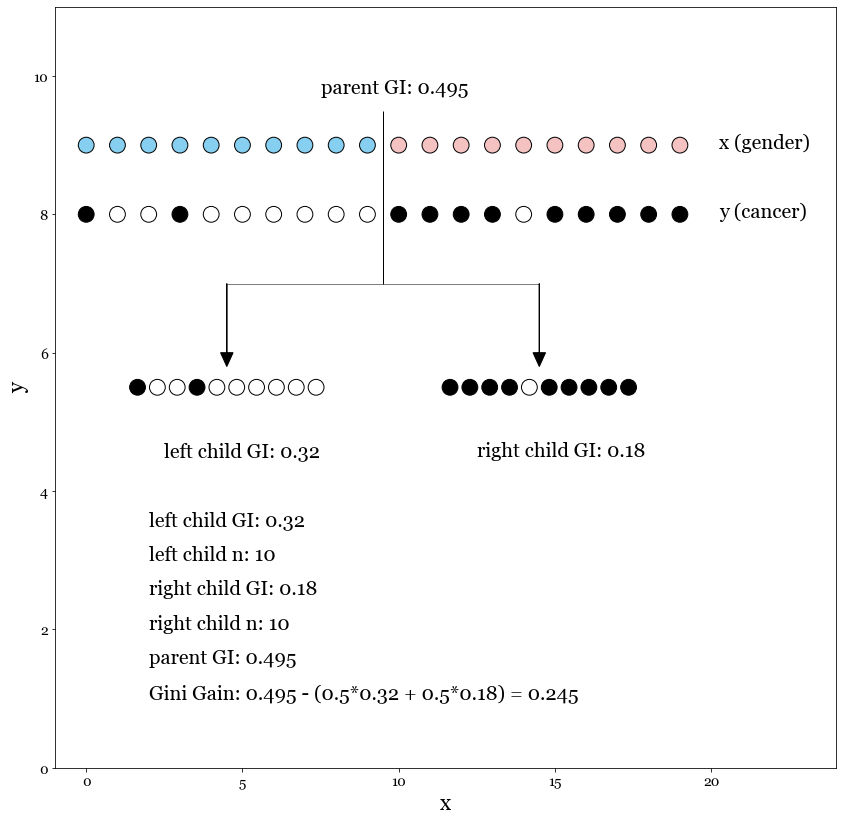

In [341]:
split_x0_ideal = 4.5
split_x1_ideal = 14.5
for i in range(1,len(split_locations)-1):
    plt.figure(figsize=(14,14))
    plt.scatter(range(20),9+np.zeros((20)),edgecolor='k',c=Cgender,s=250)
    plt.scatter(range(20),8+np.zeros((20)),edgecolor='k',c=Ccancer,s=250)
    split_x = split_locations[i] - 0.5
    split_x0 = (split_locations[i-1] - 0.5 + split_x) / 2
    split_x1 = (split_locations[i+1] - 0.5 + split_x) / 2
    if (split_x0 > split_x0_ideal):
        split_x0 = split_x0_ideal
    if (split_x1 < split_x1_ideal):
        split_x1 = split_x1_ideal
    plt.plot([split_x0,split_x1],[7,7],'k',linewidth=0.5)
    plt.arrow(split_x,9.5,0,-2.5,
              width=0.0001,
              length_includes_head=True,
              head_width = 0,
              head_length = 0,
              overhang = 0,
              head_starts_at_zero=True,facecolor='k')
    plt.arrow(split_x0,7,0,-1,
              width=0.0001,
              length_includes_head=False,
              head_width = 0.4,
              head_length = 0.2,
              overhang = 0,
              head_starts_at_zero=False,facecolor='k')
    plt.arrow(split_x1,7.0,0,-1,
              width=0.0001,
              length_includes_head=False,
              head_width = 0.4,
              head_length = 0.2,
              overhang = 0,
              head_starts_at_zero=False,facecolor='k')
    
    y_left = y_sorted[:split_locations[i]]
    y_right = y_sorted[split_locations[i]:]
    step_left = len(y_left) / 3.5
    step_right = len(y_right) / 3.5
    left_x = np.linspace(split_x0-step_left,split_x0+step_left,len(y_left))
    right_x = np.linspace(split_x1-step_right,split_x1+step_right,len(y_right))
    plt.scatter(left_x,5.5+np.zeros((len(y_left))),edgecolor='k',c=cancer_colors[y_left,:],s=250)
    plt.scatter(right_x,5.5+np.zeros((len(y_right))),edgecolor='k',c=cancer_colors[y_right,:],s=250)
    

    gini_left = compute_gini_impurity(y_left)
    gini_right = compute_gini_impurity(y_right)
    gini_weight_left = len(y_left) / len(y_sorted)
    gini_weight_right = len(y_right) / len(y_sorted)
    gini_gain = gini_parent - (gini_left*gini_weight_left + gini_right*gini_weight_right)
    formula = str(np.round(gini_parent,4)) + ' - ('  + str(np.round(gini_weight_left,4)) + '*'
    formula = formula + str(np.round(gini_left,4)) + ' + ' + str(np.round(gini_weight_right,4)) + '*'
    formula = formula + str(np.round(gini_right,4)) + ') = ' + str(np.round(gini_gain,4))
    plt.text(split_x0-2,4.5,'left child GI: ' + str(np.round(gini_left,4)),**csfont,fontsize=20)
    plt.text(split_x1-2,4.5,'right child GI: ' + str(np.round(gini_right,4)),**csfont,fontsize=20)
    plt.text(7.5,9.75,'parent GI: ' + str(np.round(gini_parent,4)),**csfont,fontsize=20)
    plt.text(2,3.5,'left child GI: ' + str(np.round(gini_left,4)),**csfont,fontsize=20)
    plt.text(2,3.0,'left child n: ' + str(len(y_left)),**csfont,fontsize=20)
    plt.text(2,2.5,'right child GI: ' + str(np.round(gini_right,4)),**csfont,fontsize=20)
    plt.text(2,2.0,'right child n: ' + str(len(y_right)),**csfont,fontsize=20)
    plt.text(2,1.5,'parent GI: ' + str(np.round(gini_parent,4)),**csfont,fontsize=20)
    plt.text(2,1.0,'Gini Gain: ' + formula,**csfont,fontsize=20)
    plt.text(20.25,7.95,'y (cancer)',**csfont,fontsize=20)
    plt.text(20.25,8.95,'x (gender)',**csfont,fontsize=20)
    plt.axis((-1,24,0,11))
    plt.xticks(fontsize=14,**csfont);
    plt.yticks(fontsize=14,**csfont);
    plt.xlabel('x',fontsize=22,**csfont);
    plt.ylabel('y',fontsize=22,**csfont);
    plt.savefig('../../assets/matplotlib/016_compute_split_gender.png',dpi=300,bbox_inches="tight")    